In [1]:
import pandas as pd
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
y_labels = [
    'Exp_1', 'Exp_2', 'Exp_3', 'Exp_4', 
    'Exp_5', 'Exp_6', 'Exp_7', 'Exp_8', 'Exp_9', 'Exp_10', 'Exp_11'
]

In [2]:
df = pd.read_csv('../Data/Knowledge_Interaction_ds.csv')

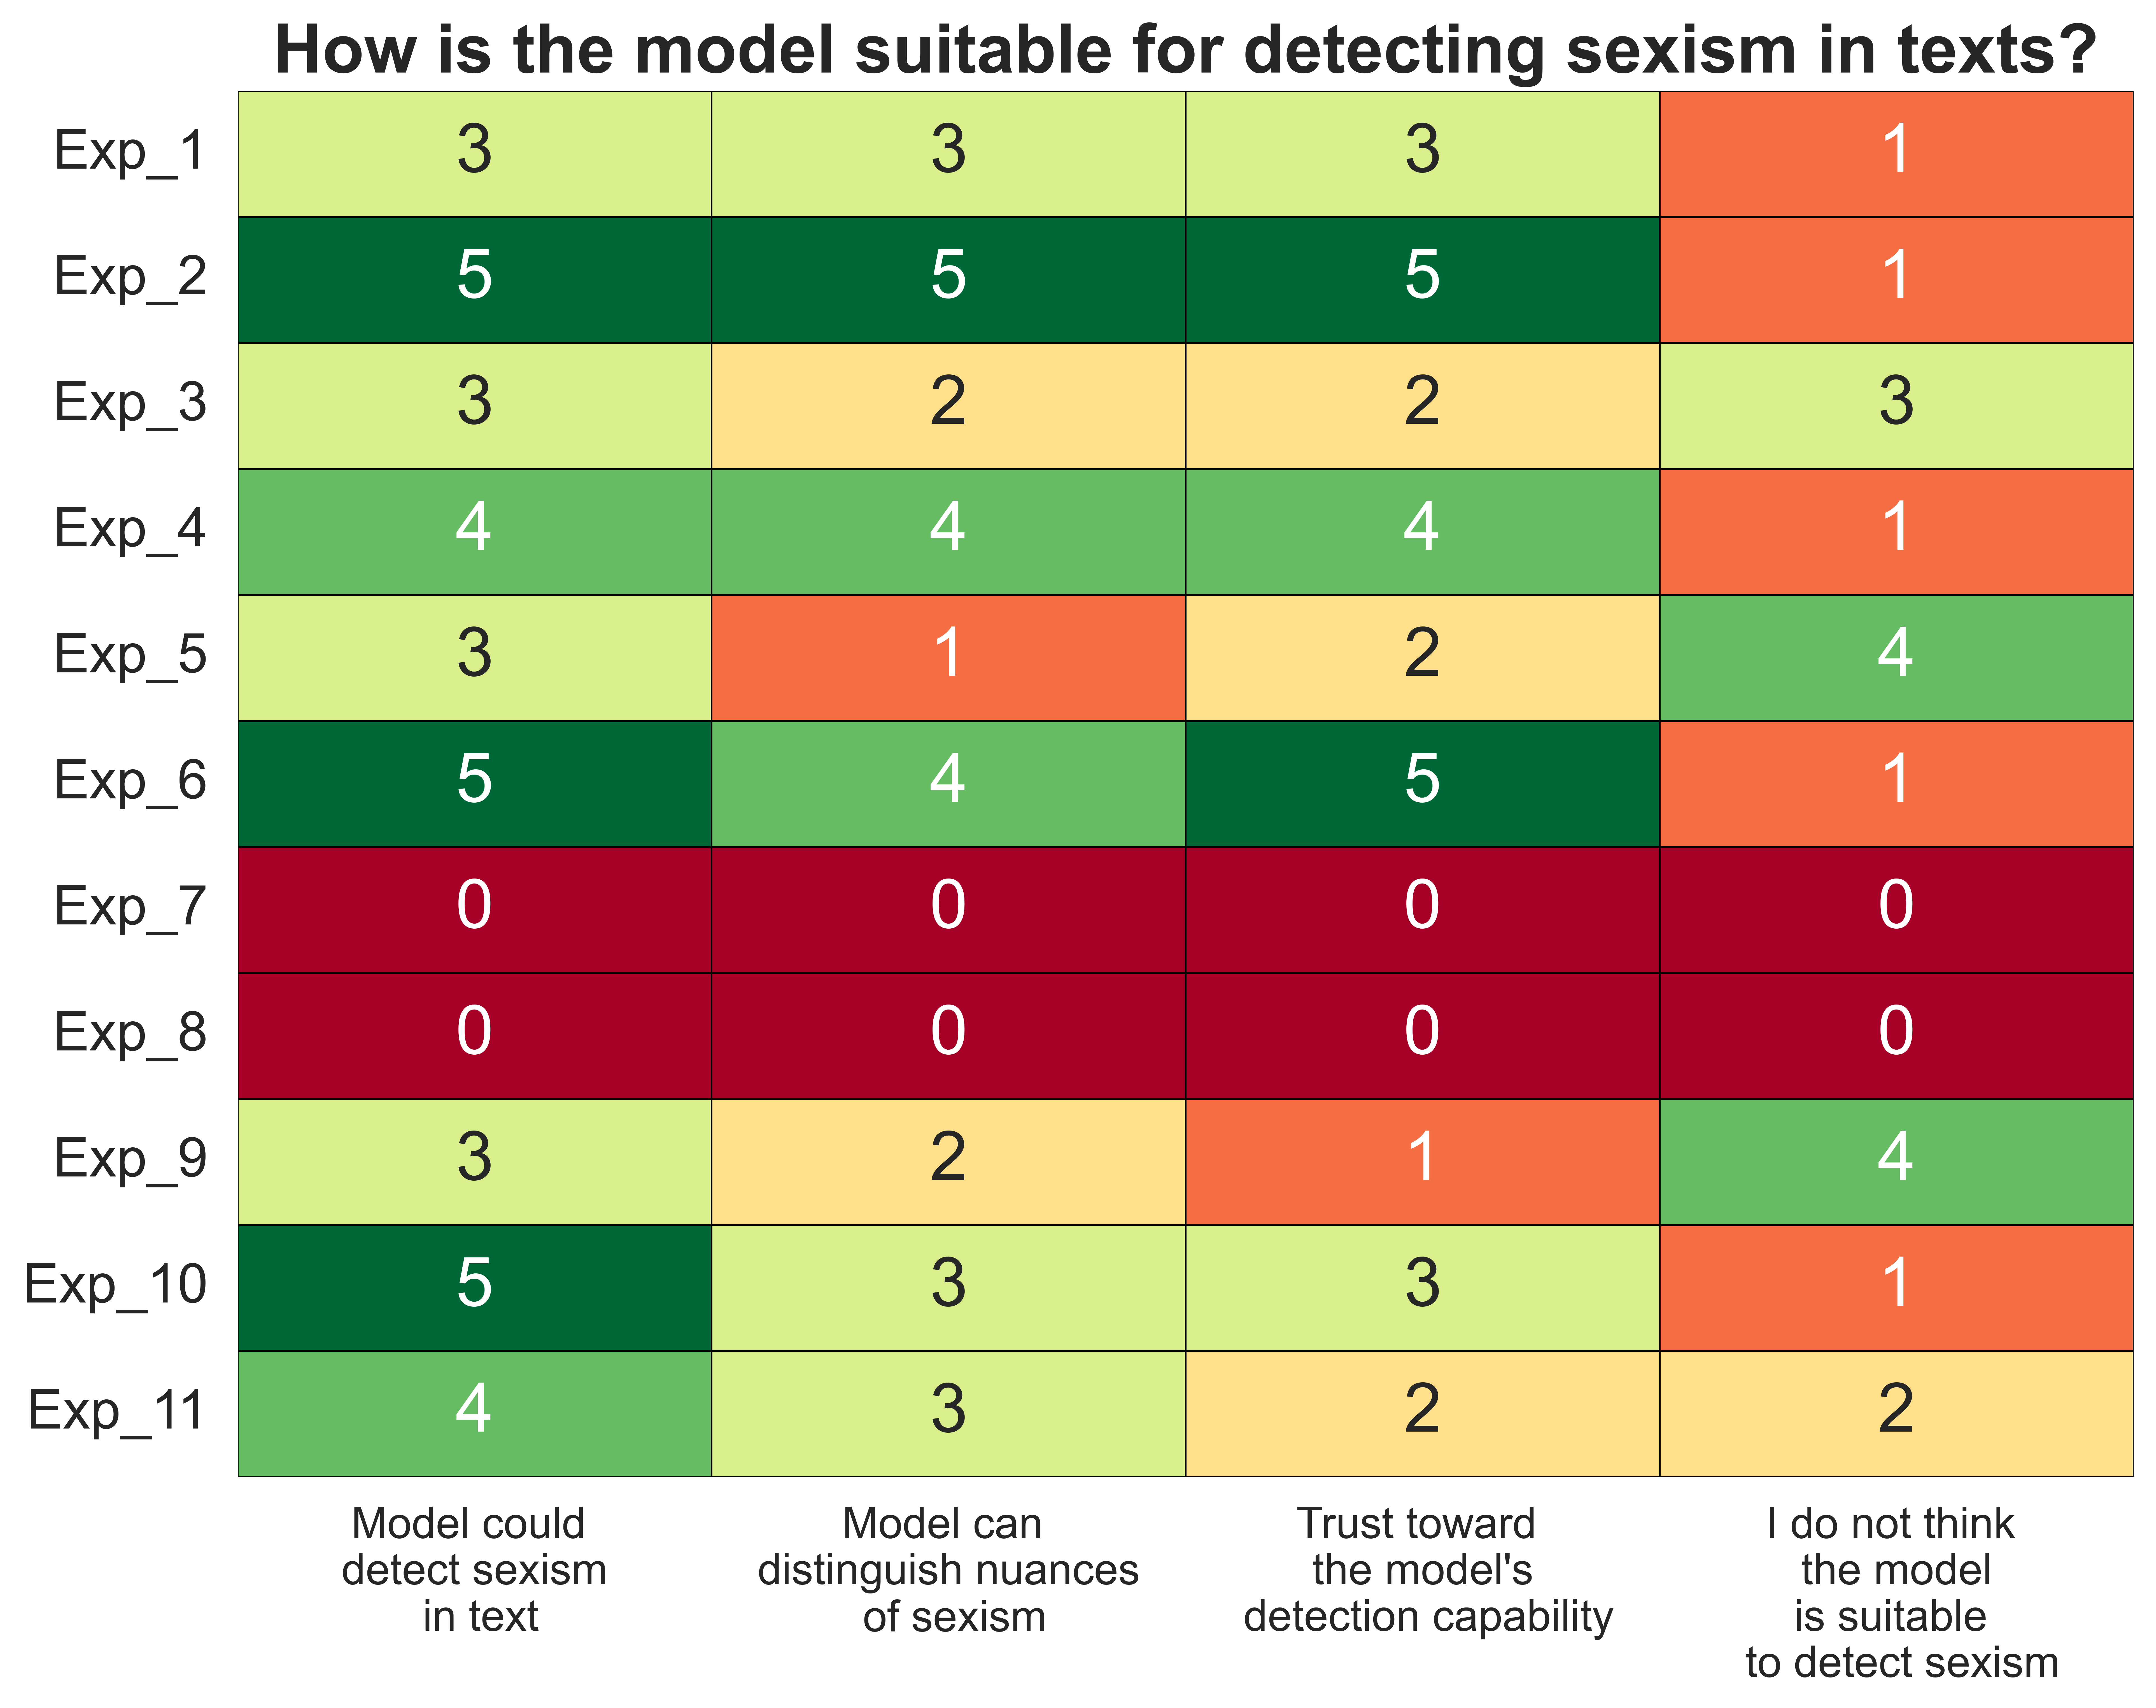

In [3]:
likert_columns = [
    'Likert_model_1', 'Likert_model_2',
    'Likert_model_3', 'Likert_model_4', 
]

question_labels = [
    'Model could \n detect sexism \n in text', 
    'Model can \n distinguish nuances \n of sexism',
    "Trust toward \n the model's \n detection capability", 
    'I do not think \n the model \nis suitable \n to detect sexism', 
]

# Replace Likert scale responses with numerical values
likert_scale = {
        np.nan: 0,  # Ensure NaN values are handled
        'Strongly disagree': 1,
        'Somewhat disagree': 2,
        'Neither agree nor disagree': 3,
        'Somewhat agree': 4,
        'Strongly agree': 5
        }

# Replace Likert scale responses with numerical values and convert them to integers
df_numeric = df[likert_columns].replace(likert_scale).astype(int)

# Set the index to 'ResponseId'
df_numeric.index = df['ResponseId']


# Create the heatmap with enhancements
plt.figure(figsize=(10, 8), dpi=800)  # Increase figure size and set higher DPI
sns.set(font_scale=1.6)  # Increase font size for better readability
heatmap = sns.heatmap(
    df_numeric, 
    annot=True, 
    fmt="d",
    cmap='RdYlGn',
    linewidths=.5,
    linecolor='black',
    annot_kws={"size": 22},
    cbar=False  # Disable the color bar
)


# Set custom x-axis labels
heatmap.set_xticklabels(question_labels, ha='center', rotation=0, fontsize=14)
heatmap.set_yticklabels(y_labels, rotation=0, ha='right')  # Rotate and align labels


# Improve axis labels and title
plt.ylabel('', fontsize=14)
plt.title('How is the model suitable for detecting sexism in texts?', fontsize=22, weight='bold')

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the figure with high DPI
# Show the heatmap
#plt.savefig('', bbox_inches='tight')

plt.show()

